<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2">Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Procedure:" data-toc-modified-id="Procedure:-2.1">Procedure:</a></span></li><li><span><a href="#Data-Visualizations" data-toc-modified-id="Data-Visualizations-2.2">Data Visualizations</a></span><ul class="toc-item"><li><span><a href="#7-day-and-30-day-means-plots" data-toc-modified-id="7-day-and-30-day-means-plots-2.2.1">7-day and 30-day means plots</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3">Summary</a></span></li></ul></div>

# Import Libraries

In [164]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

# Data Wrangling

## Procedure:

- Data Wrangling

1.  Appropriate datatype for features?  Datetime index?
2.  Missing/NaN values present?

- Resample logins into 15 min intervals

- 24 hr Trends
    1.  Which days of the week see highest and lowest number of logins on average?
    2.  Which hours see highest and lowest number of logins on average?
    

- Monthly
   Is there increasing or decreasing trend over the course of the sampling period?

- Seasonal Decomposition?



In [145]:
df = pd.read_json('./logins.json')

In [146]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [202]:
# checking df info and missing values.  zero no-null values found.

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


login_time    0
dtype: int64

In [148]:
# set index to create Time Series Dataframe
df.set_index(df.login_time, inplace=True)

#remove index name
df.index.name = None

df

,login_time
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21
...,...
1970-04-13 18:50:19,1970-04-13 18:50:19
1970-04-13 18:43:56,1970-04-13 18:43:56
1970-04-13 18:54:02,1970-04-13 18:54:02
1970-04-13 18:57:38,1970-04-13 18:57:38


In [149]:
# resample by 15 min intervals

df_15min = df.resample("15min").count()
df_15min

,login_time
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7


In [150]:
# reworking dataframe of 15-min interval login counts to extract weekday, month, year, day, hour, min, second
# values for new feature columns

df_15min['weekday'] = df_15min.index
df_15min['week'] = df_15min.index.isocalendar().week
df_15min['year'] = df_15min.index.year
df_15min['month'] = df_15min.index.month
df_15min['day'] = df_15min.index.day
df_15min['weekday'] = df_15min.index.strftime('%A')
df_15min['hour'] = df_15min.index.hour
df_15min['minute'] = df_15min.index.minute
df_15min['second'] = df_15min.index.second

df_15min = df_15min.rename(columns={"login_time": "login_count"})

df_15min.head()

,login_count,weekday,week,year,month,day,hour,minute,second
1970-01-01 20:00:00,2,Thursday,1,1970,1,1,20,0,0
1970-01-01 20:15:00,6,Thursday,1,1970,1,1,20,15,0
1970-01-01 20:30:00,9,Thursday,1,1970,1,1,20,30,0
1970-01-01 20:45:00,7,Thursday,1,1970,1,1,20,45,0
1970-01-01 21:00:00,1,Thursday,1,1970,1,1,21,0,0


## Data Visualizations

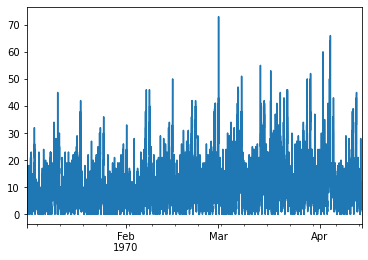

In [151]:
#  Plot of login_count versus 15-min intervals for all sampling period
#  Distinct large peak at beginning March might need to be checked for accuracy

df_15min.login_count.plot();

### 7-day and 30-day means plots

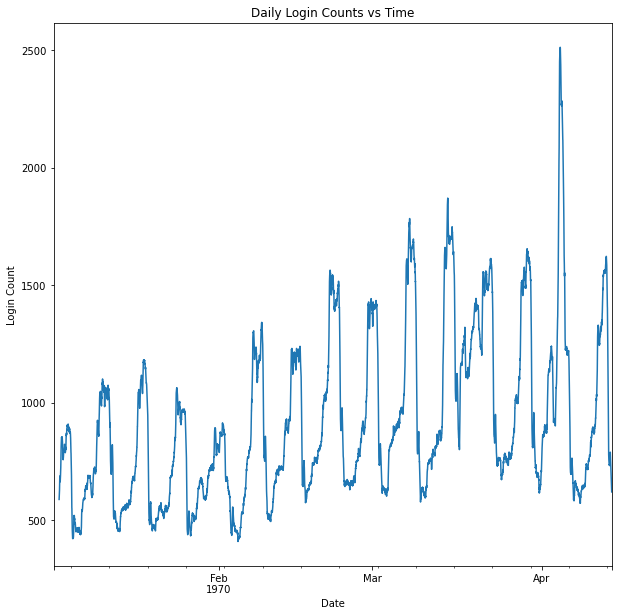

In [214]:
#daily login_count over sampling period.  plot shows strong cylical pattern.

ax = df_15min.login_count.rolling(window=96).sum().plot(figsize=(10,10))

ax.set_xlabel('Date')
ax.set_ylabel('Login Count')
ax.set_title('Daily Login Counts vs Time');

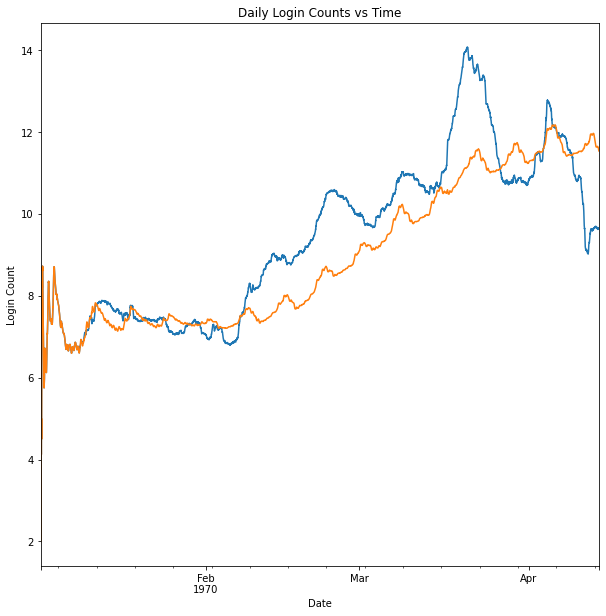

In [215]:
# Rolling seven day and 30 day means smooth out data plots.
# 30-day plot shows cyclical variation and increasing login count trend over sampling period.


ax = df_15min.login_count.rolling('7D').mean().plot(figsize=(10,10))
ax = df_15min.login_count.rolling('30D').mean().plot(figsize=(10,10))

ax.set_xlabel('Date')
ax.set_ylabel('Login Count')
ax.set_title('Daily Login Counts vs Time');

In [203]:
#  Use groupby and weekday feature to calculate the mean number of logins for each day of the week.

logins_by_weekday = df_15min.groupby('weekday').mean()
logins_by_weekday = logins_by_weekday.sort_values('login_count', ascending = False)

logins_by_weekday

# Saturday sees largest number of logins, followed closely by Sunday and Friday

,login_count,week,year,month,day,hour,minute,second
weekday,,,,,,,,
Saturday,13.456250,8.000000,1970.0,2.200000,16.000000,11.500000,22.5,0.0
Sunday,12.615972,8.000000,1970.0,2.333333,13.066667,11.500000,22.5,0.0
Friday,10.561111,8.000000,1970.0,2.200000,15.000000,11.500000,22.5,0.0
Thursday,8.794118,8.411765,1970.0,2.270588,14.764706,11.617647,22.5,0.0
Wednesday,7.692708,8.500000,1970.0,2.285714,13.928571,11.500000,22.5,0.0
Tuesday,6.895833,8.500000,1970.0,2.214286,15.142857,11.500000,22.5,0.0
Monday,6.213380,8.901408,1970.0,2.309859,14.081690,11.366197,22.5,0.0


In [157]:
# groupby using weekday, hour, min

df_ = df_15min.groupby(['weekday', 'hour', 'minute']).mean()
df_.reset_index(inplace=True)

# create time feature from hour and minute column values.
df_['time'] = (pd.to_datetime(df_['hour'].astype(str) + ':' + df_['minute'].astype(str), format='%H:%M')
          .dt.time)

df_

login_count  week    year     month        day  second
weekday   hour minute                                                        
Friday    0    0         15.800000   8.0  1970.0  2.200000  15.000000     0.0
               15        17.533333   8.0  1970.0  2.200000  15.000000     0.0
               30        15.466667   8.0  1970.0  2.200000  15.000000     0.0
               45        16.200000   8.0  1970.0  2.200000  15.000000     0.0
          1    0         17.266667   8.0  1970.0  2.200000  15.000000     0.0
...                            ...   ...     ...       ...        ...     ...
Wednesday 22   45        13.785714   8.5  1970.0  2.285714  13.928571     0.0
          23   0         14.714286   8.5  1970.0  2.285714  13.928571     0.0
               15        15.785714   8.5  1970.0  2.285714  13.928571     0.0
               30        17.785714   8.5  1970.0  2.285714  13.928571     0.0
               45        16.571429   8.5  1970.0  2.285714  13.928571     0.0

[672 rows x 6 columns]

In [226]:
# Plot. 15-min login count averages over 24-hr period for each day of the week.

fig = px.line(df_, x = 'time',y='login_count', color = 'weekday')

# axes
fig.update_layout({'xaxis': {'title': {'text': 'Time of Day'}},
                   'yaxis': {'title': {'text': 'Login Count'}}})
fig.update_layout({'title': {'text': 'Average Login Counts vs Time of Day', 'xref': 'paper', 'x': 0.5}})

fig.show()

# Summary

Logins data follows two patterns, weekday and weekend.  The weekday pattern is characterized by a mid-day peak occuring roughly from 11a-12p.  Days of the weekday exhibiting this pattern include Monday, Tuesday, Wednesday, Thursday, and Friday.  

The weekend pattern shows substantial number of logins occuring from 00:00 thru 05:00 with a distinct peak at 04:45 followed by a steep drop.  A second characteristic of the weekend pattern is the larger number of logins in the afternoon hours from 13:30 thru 17:00 compared to the same time period for Monday thru Thursday.  Saturday and Sunday are best examples of this pattern.

The largest late evening login counts from 21:00 thru 23:30 occur on Fridays.